<h2><center> The Ernst & Young Carbon Prediction Hackathon</h2></center>
<figure>
<!-- <center><img src ="https://drive.google.com/uc?export=view&id=1hSOAfRhJ_jo-MZAjq81VYJu5bZNL7EjD" width = "800" height = '500'/> -->

*About the problem*
> The ability to accurately monitor carbon emissions is a critical step in the fight against climate change. Precise carbon readings allow researchers and governments to understand the sources and patterns of carbon mass output. While Europe and North America have extensive systems in place to monitor carbon emissions on the ground, there are few available in Africa.

*Objective of this challenge*
> The objective of this challenge is to create machine learning or a deep learning model using open-source CO2 emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

These solutions will enable EY, governments, and other actors to estimate carbon emission levels across Africa, even in places where on-the-ground monitoring is not possible.

t & Young Carbon Prediction Hackathon

# 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set seed for reproducability
import random
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

# 2. import the datasets

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.939440,...,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.051700
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,16.624162,...,3711.511365,68491.753342,3034.461661,12.218664,0.244987,4.708856,42.586683,-89.904314,22.773246,88.875670
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019,3,-0.000065,0.860306,-0.000062,0.161050,-13.237244,...,2136.385189,78967.739548,1433.482587,6.062737,0.245102,76.060628,34.737544,-83.595254,17.437300,91.723114
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019,4,0.000152,0.422284,0.000087,0.046504,-13.534653,...,3841.853018,64592.806769,2878.512917,6.388233,0.210904,75.912368,60.294490,-71.896728,11.977818,92.883870
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019,5,0.000024,1.004578,0.000028,0.214246,-13.475718,...,1295.688171,86804.025391,1094.665344,9.206252,0.261103,-13.346079,50.194493,-77.462082,24.374270,94.878330


In [4]:
for column in train.columns:
    print(column)

ID_LAT_LON_YEAR_WEEK
latitude
longitude
year
week_no
SulphurDioxide_SO2_column_number_density
SulphurDioxide_SO2_column_number_density_amf
SulphurDioxide_SO2_slant_column_number_density
SulphurDioxide_cloud_fraction
SulphurDioxide_sensor_azimuth_angle
SulphurDioxide_sensor_zenith_angle
SulphurDioxide_solar_azimuth_angle
SulphurDioxide_solar_zenith_angle
SulphurDioxide_SO2_column_number_density_15km
CarbonMonoxide_CO_column_number_density
CarbonMonoxide_H2O_column_number_density
CarbonMonoxide_cloud_height
CarbonMonoxide_sensor_altitude
CarbonMonoxide_sensor_azimuth_angle
CarbonMonoxide_sensor_zenith_angle
CarbonMonoxide_solar_azimuth_angle
CarbonMonoxide_solar_zenith_angle
NitrogenDioxide_NO2_column_number_density
NitrogenDioxide_tropospheric_NO2_column_number_density
NitrogenDioxide_stratospheric_NO2_column_number_density
NitrogenDioxide_NO2_slant_column_number_density
NitrogenDioxide_tropopause_pressure
NitrogenDioxide_absorbing_aerosol_index
NitrogenDioxide_cloud_fraction
NitrogenDi

In [5]:
train.dtypes

ID_LAT_LON_YEAR_WEEK           object
latitude                      float64
longitude                     float64
year                            int64
week_no                         int64
                               ...   
Cloud_sensor_azimuth_angle    float64
Cloud_sensor_zenith_angle     float64
Cloud_solar_azimuth_angle     float64
Cloud_solar_zenith_angle      float64
emission                      float64
Length: 76, dtype: object

In [6]:
train.shape

(74005, 76)

# 3. Train statistical summary

In [7]:
train.describe(include = 'all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,74005,74005.000000,74005.000000,74005.000000,74005.000000,72075.000000,72075.000000,72075.000000,72075.000000,72075.000000,...,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,7.400500e+04
unique,74005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.73_28.77_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.829723,27.782742,2020.478049,26.156098,0.000263,0.515875,0.000091,0.105690,4.487627,...,3652.349722,74390.624457,2871.262815,15.825386,0.225441,-14.277119,49.567836,-50.513220,40.558959,7.891061e+03
std,NaN,2.760589,2.746672,1.111261,14.843840,0.000599,0.196766,0.000199,0.069555,52.246537,...,1807.385280,12859.067332,1645.827671,19.696645,0.063131,47.277321,12.097417,20.623907,12.201179,5.257160e+04
min,NaN,-33.930000,21.070000,2019.000000,1.000000,-0.000989,0.133738,-0.000828,0.000000,-110.027657,...,128.299794,14541.977986,10.300364,1.151138,0.000000,-125.298058,0.100882,-97.570906,10.906227,4.806346e-02
25%,NaN,-29.630000,26.670000,2019.000000,13.000000,-0.000066,0.371745,-0.000034,0.052482,-18.178128,...,2260.917450,65920.340500,1602.615232,5.071849,0.183490,-31.952090,41.329129,-67.987723,29.786592,1.545472e+02
50%,NaN,-28.130000,28.770000,2020.000000,26.000000,0.000147,0.488695,0.000073,0.099513,-10.987544,...,3437.878915,75994.802018,2563.926290,8.609041,0.223503,-13.738030,53.233031,-45.413921,40.117572,7.231359e+02
75%,NaN,-25.730000,29.470000,2021.000000,39.000000,0.000441,0.623530,0.000191,0.152480,59.119988,...,4745.607936,84409.691135,3819.671389,17.478625,0.267716,3.790391,59.478133,-33.124961,51.445698,2.773029e+03


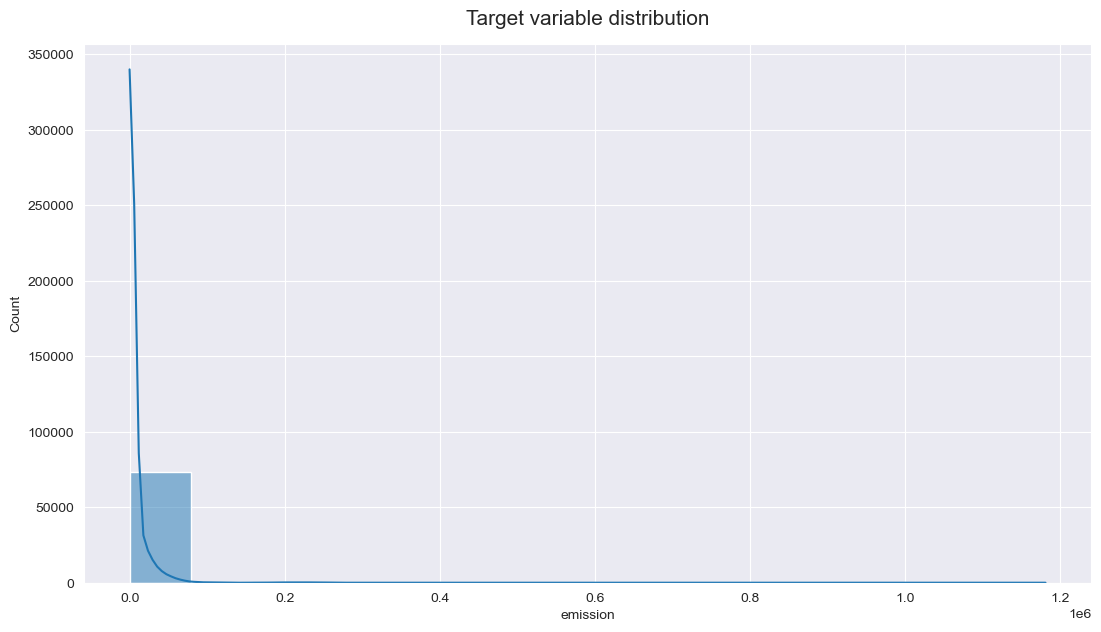

None

17.038027449698163

In [8]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())

In [9]:
target_log = np.log(train.emission)

Text(0.5, 1.02, 'Transformed target variable distribution (log)')

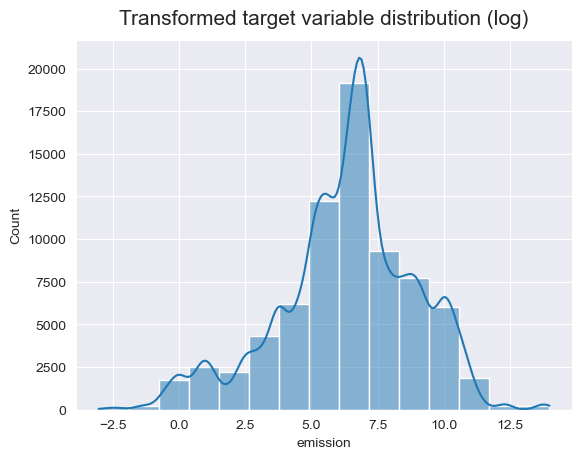

In [10]:
# Plot the histogram of the transformed target variable
sns.histplot(target_log, kde = True, bins = 15)
plt.title('Transformed target variable distribution (log)', y = 1.02, fontsize = 15)

In [11]:
# Display the skewness values
display(plt.show(), target_log.skew())

None

-0.4685478820791871

In [12]:
# Print the skewness before and after the transformation
print("Skewness before transformation:", train.emission.skew())
print("Skewness after transformation:", target_log.skew())

Skewness before transformation: 17.038027449698163
Skewness after transformation: -0.4685478820791871


# 4.Outliers and Handling them

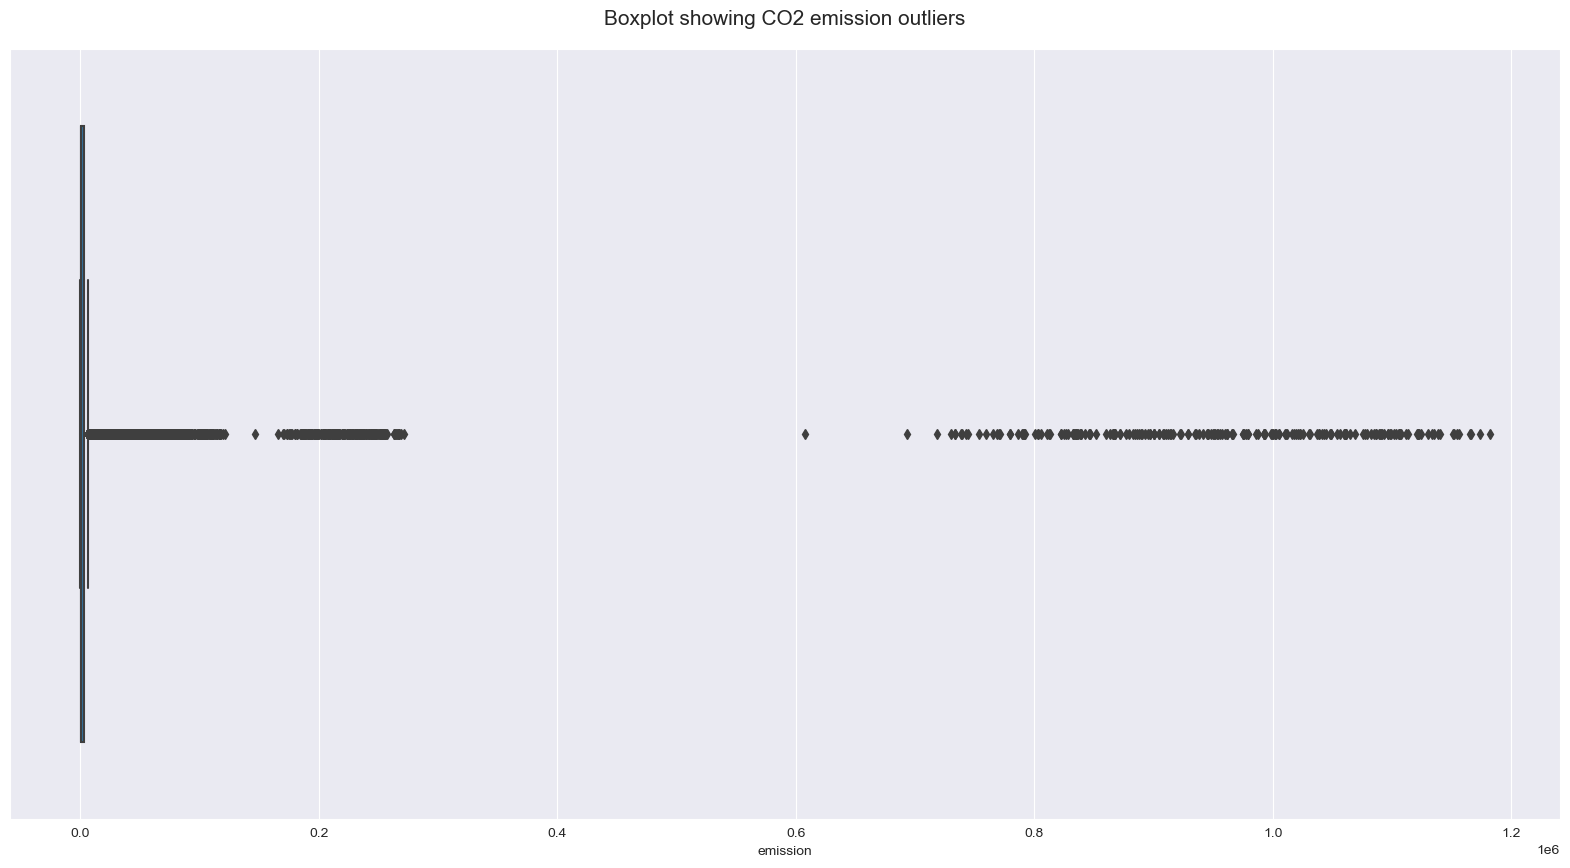

In [13]:
# Plotting boxplot for the CO2 emissions
sns.set_style('darkgrid')
plt.figure(figsize = (20, 10))
sns.boxplot(train.emission)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)  
plt.show()

In [14]:
# We drop outliers from the train.emission variable using the interquartile range (IQR) method.
# Calculate the interquartile range (IQR)
Q1 = train.emission.quantile(0.25)
Q3 = train.emission.quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [16]:
# Drop outliers from the data
train = train[train.emission.between(lower_bound, upper_bound)]

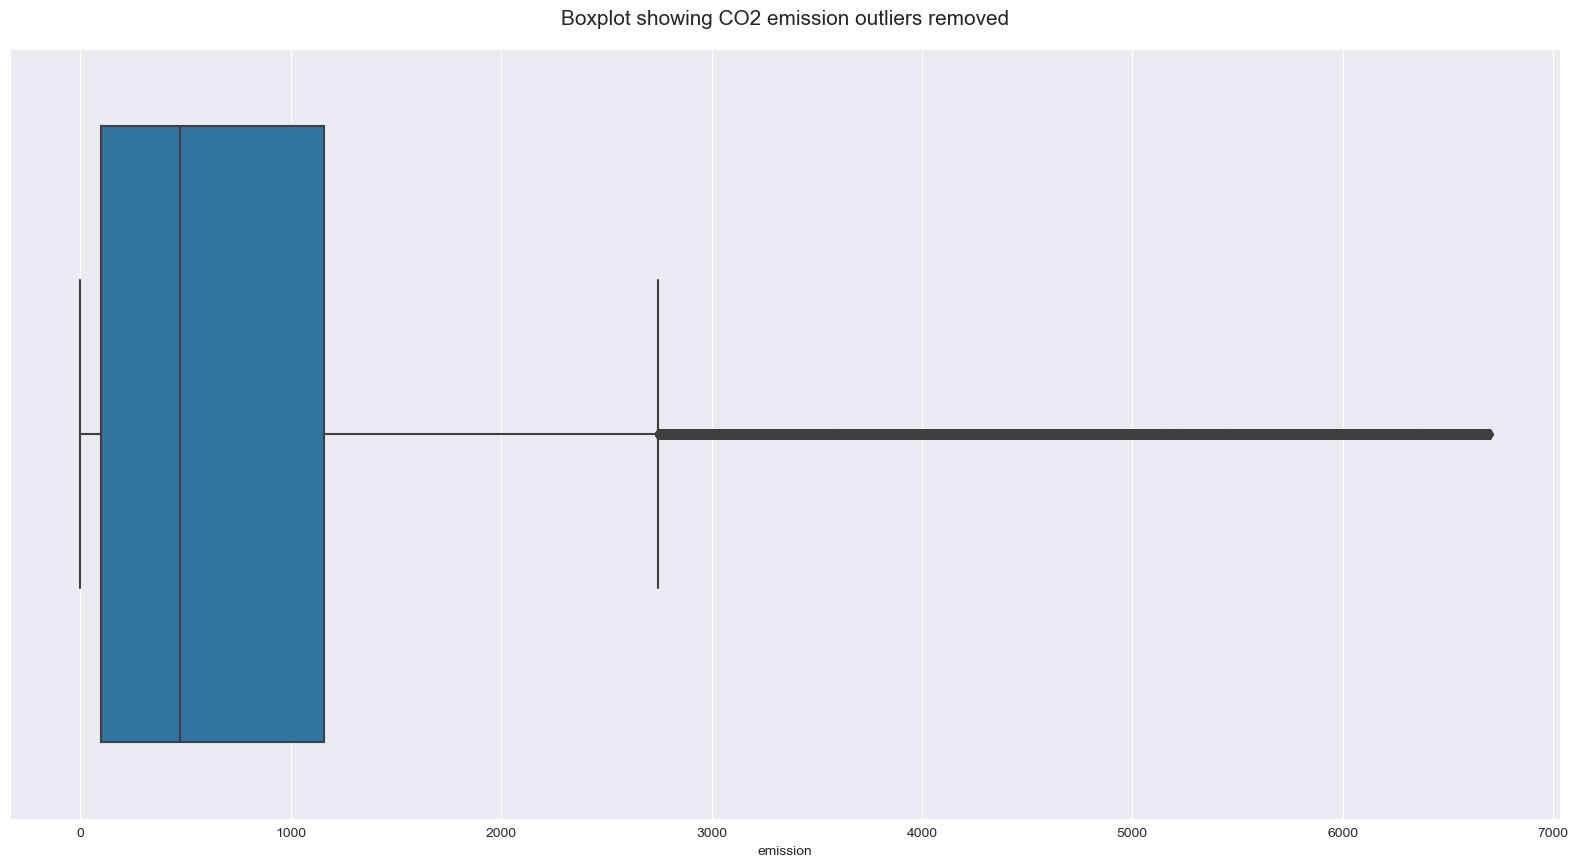

In [17]:
# Plot the boxplot of the transformed target variable
sns.set_style('darkgrid')
plt.figure(figsize = (20, 10))
sns.boxplot(train.emission)
plt.title('Boxplot showing CO2 emission outliers removed', y = 1.02, fontsize = 15)  
plt.show()

# 5. Missing values and duplicates

In [18]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any() 

(True, True)

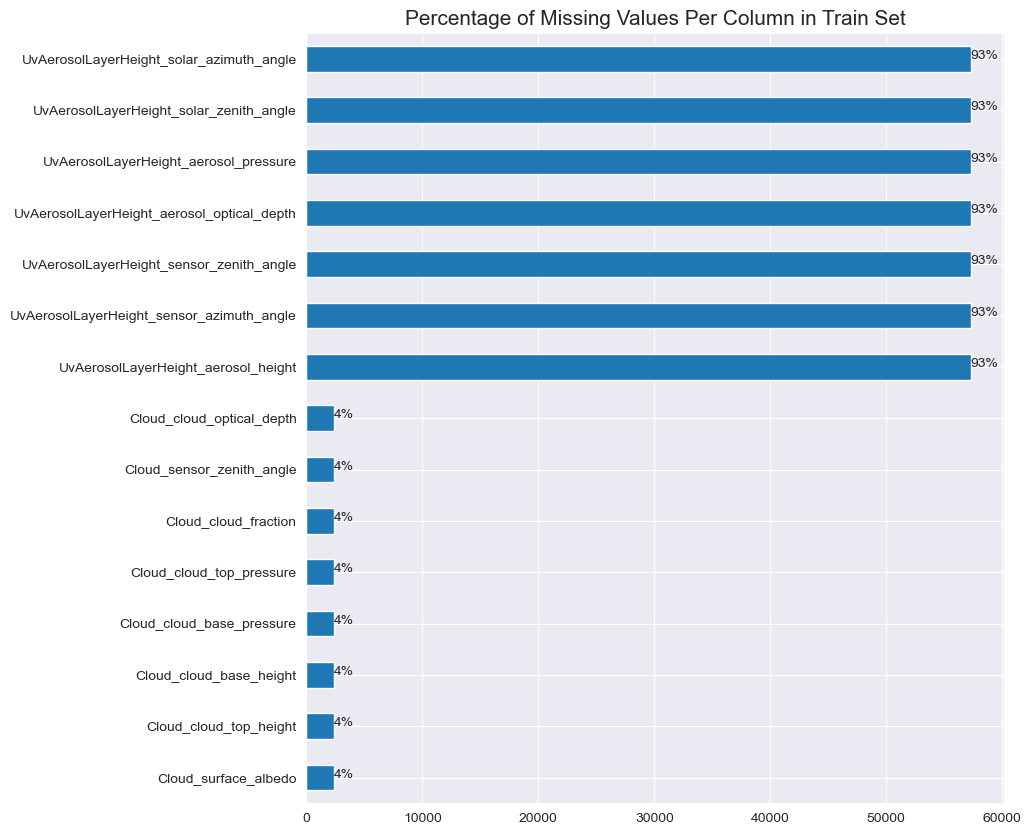

In [19]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [20]:
train.isnull().sum()

ID_LAT_LON_YEAR_WEEK             0
latitude                         0
longitude                        0
year                             0
week_no                          0
                              ... 
Cloud_sensor_azimuth_angle    2371
Cloud_sensor_zenith_angle     2371
Cloud_solar_azimuth_angle     2371
Cloud_solar_zenith_angle      2371
emission                         0
Length: 76, dtype: int64

In [21]:
test.isnull().sum()

ID_LAT_LON_YEAR_WEEK             0
latitude                         0
longitude                        0
year                             0
week_no                          0
                              ... 
Cloud_surface_albedo          1133
Cloud_sensor_azimuth_angle    1133
Cloud_sensor_zenith_angle     1133
Cloud_solar_azimuth_angle     1133
Cloud_solar_zenith_angle      1133
Length: 75, dtype: int64

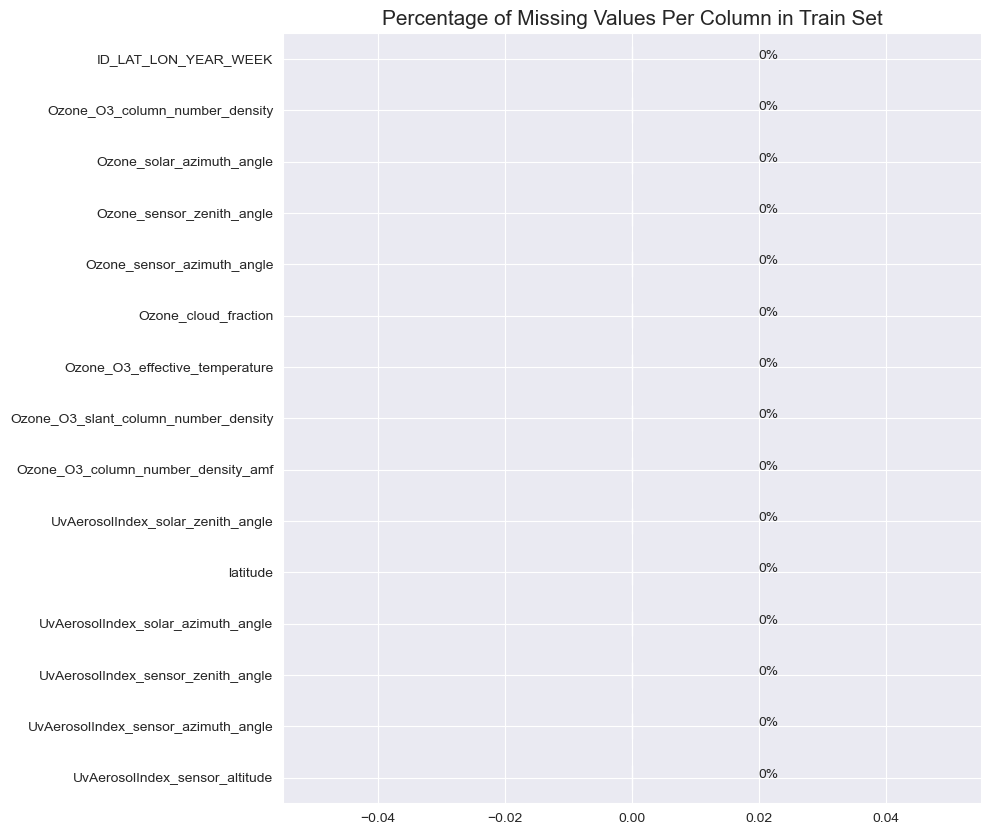

In [22]:
# Fill missing values with mean
train.fillna(train.mean(), inplace=True)

# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [23]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

# 6. Date features EDA

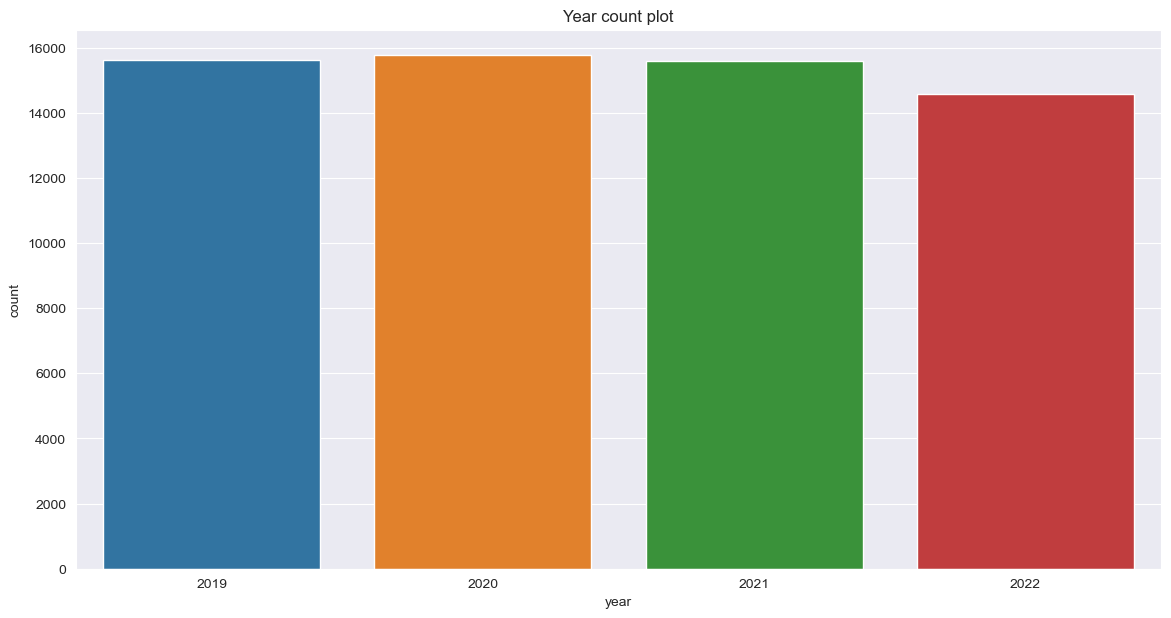

In [24]:
# Year countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'year', data = train)
plt.title('Year count plot')
plt.show()

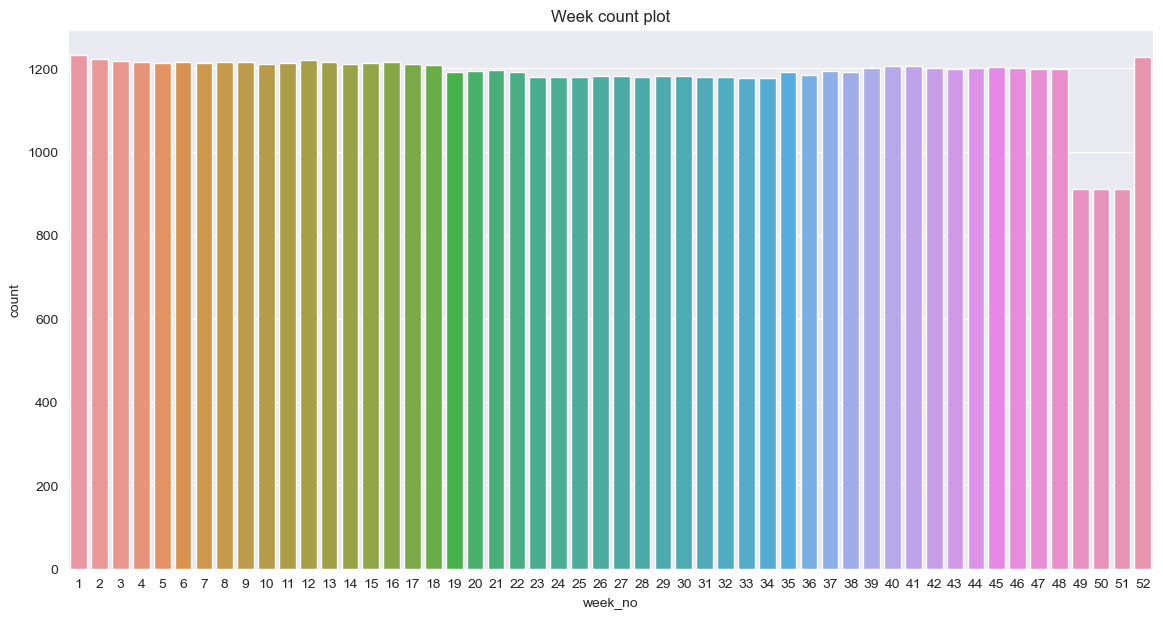

In [25]:
#  Week countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'week_no', data = train)
plt.title('Week count plot')
plt.show()

In [26]:
train.drop_duplicates(subset = ['year', 'week_no']).groupby(['year'])[['week_no']].count()

,week_no
year,
2019,52
2020,52
2021,52
2022,49


# 7. Correlations

In [27]:
# Top 20 correlated features to the target
top20_corrs = abs(train.corr()['emission']).sort_values(ascending = False).head(20)
top20_corrs

emission                                                  1.000000
longitude                                                 0.212690
NitrogenDioxide_tropospheric_NO2_column_number_density    0.115986
NitrogenDioxide_NO2_column_number_density                 0.114229
NitrogenDioxide_NO2_slant_column_number_density           0.105449
CarbonMonoxide_sensor_altitude                            0.098112
UvAerosolIndex_sensor_altitude                            0.095879
NitrogenDioxide_sensor_altitude                           0.090956
latitude                                                  0.090706
SulphurDioxide_SO2_column_number_density_amf              0.087629
Ozone_O3_slant_column_number_density                      0.058384
NitrogenDioxide_tropopause_pressure                       0.056143
Cloud_cloud_base_pressure                                 0.051665
SulphurDioxide_SO2_column_number_density                  0.051163
CarbonMonoxide_solar_zenith_angle                         0.04

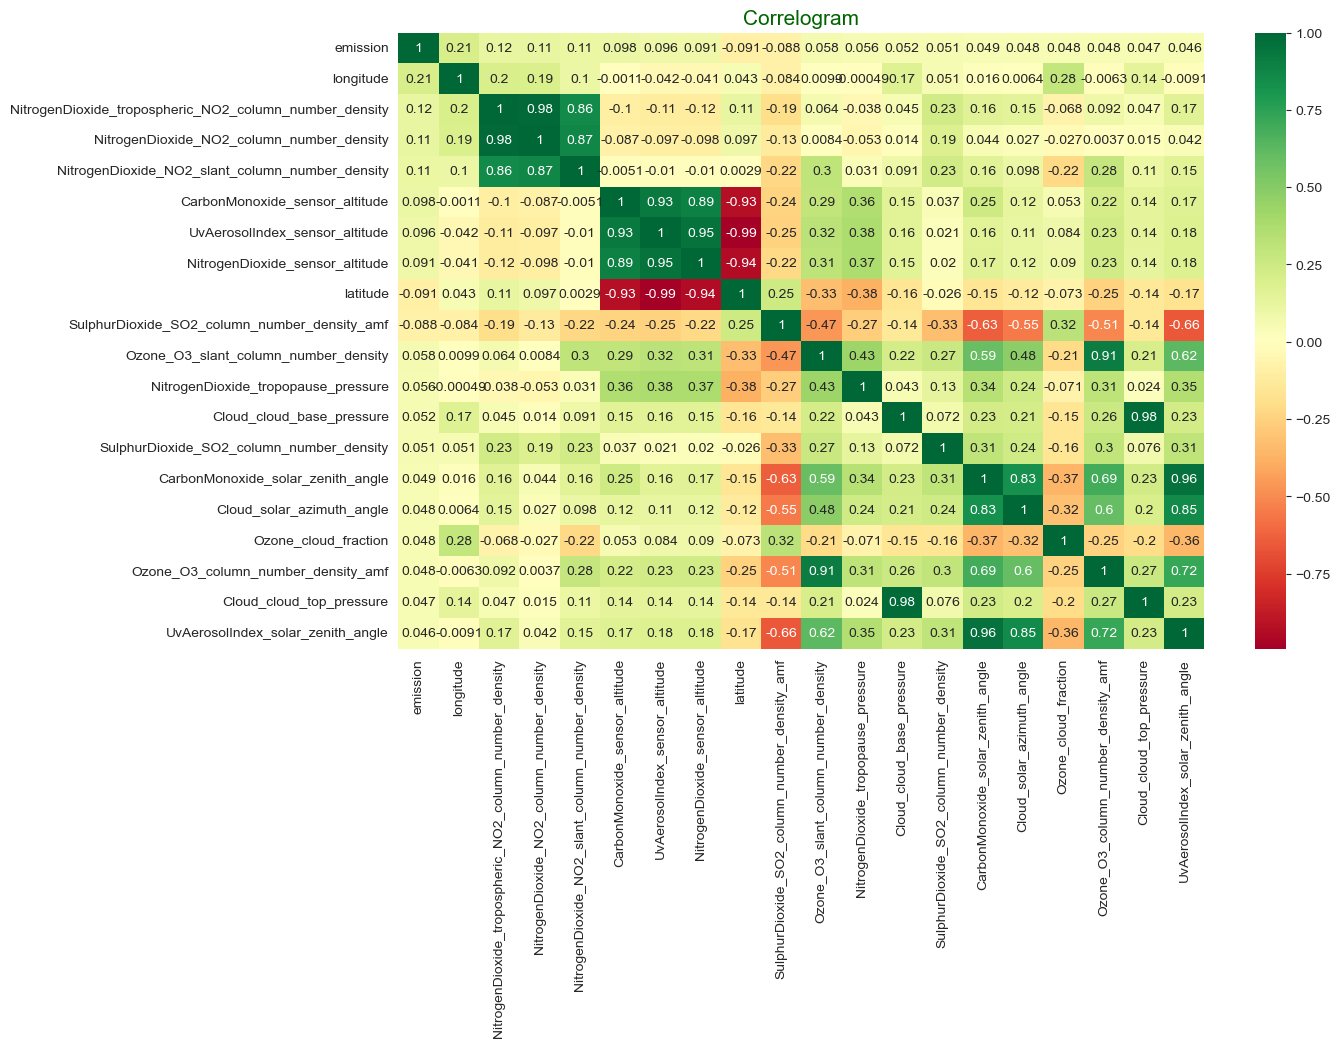

In [28]:
# Quantify correlations between features
corr = train[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

# 8. Timeseries visualization - EDA

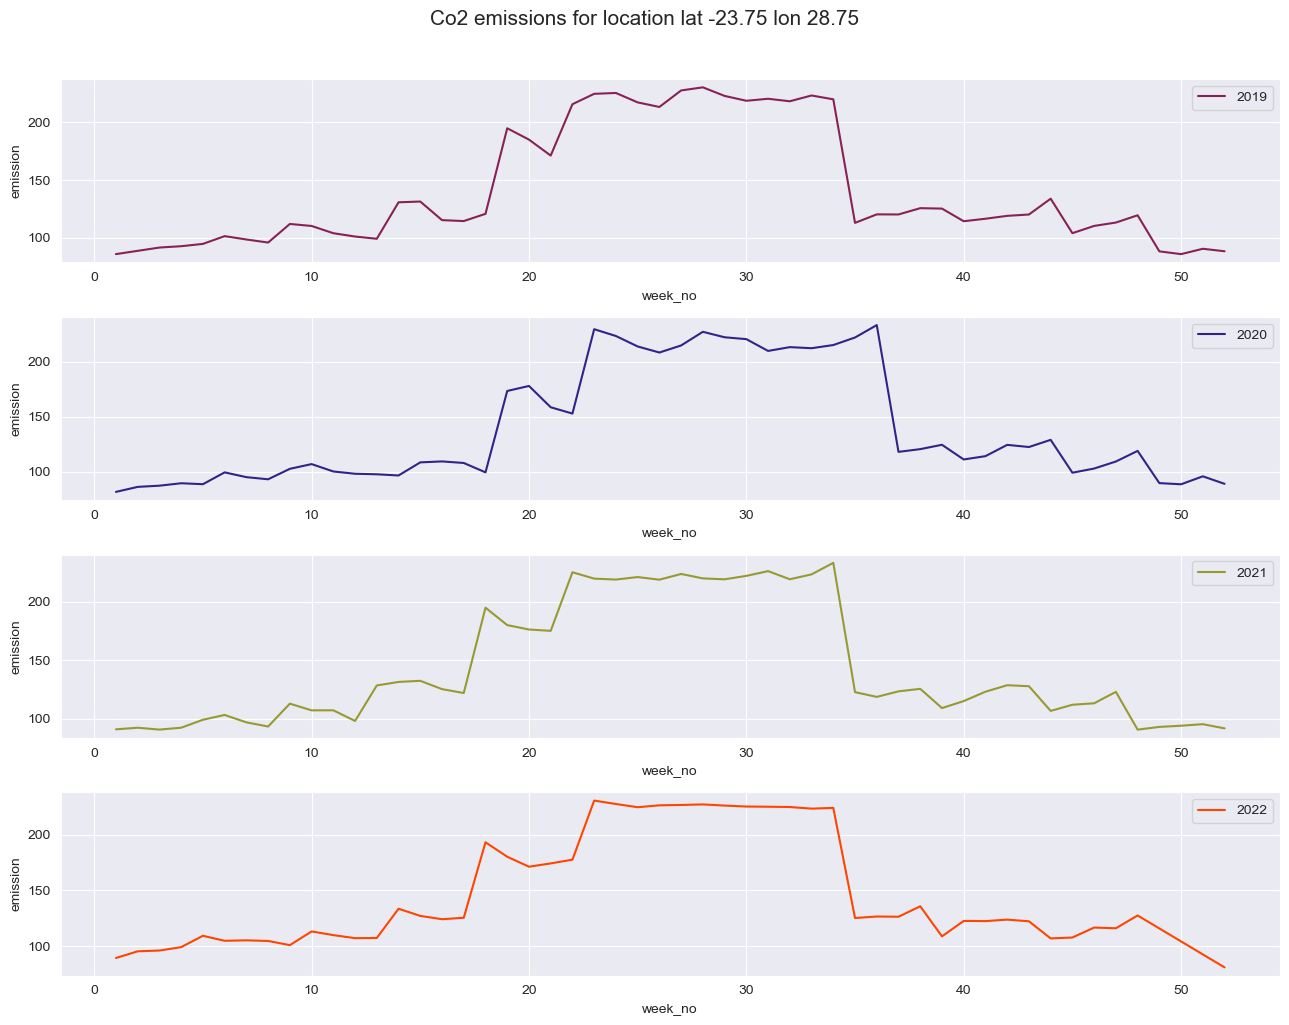

In [29]:
# Sample a unique location and visualize its emissions across the years
train.latitude, train.longitude = round(train.latitude, 2), round(train.longitude, 2)
sample_loc = train[(train.latitude == -23.73) & (train.longitude == 28.77)]

# Plot a line plot
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (13, 10))
fig.suptitle('Co2 emissions for location lat -23.75 lon 28.75', y=1.02, fontsize = 15)

for ax, data, year, color, in zip(axes.flatten(), sample_loc, sample_loc.year.unique(), ['#882255','#332288', '#999933' , 'orangered']):
  df = sample_loc[sample_loc.year == year]
  sns.lineplot(df.week_no, df.emission, ax = ax, label = year, color = color)
plt.legend()
plt.tight_layout()

# 9. Feature engineering

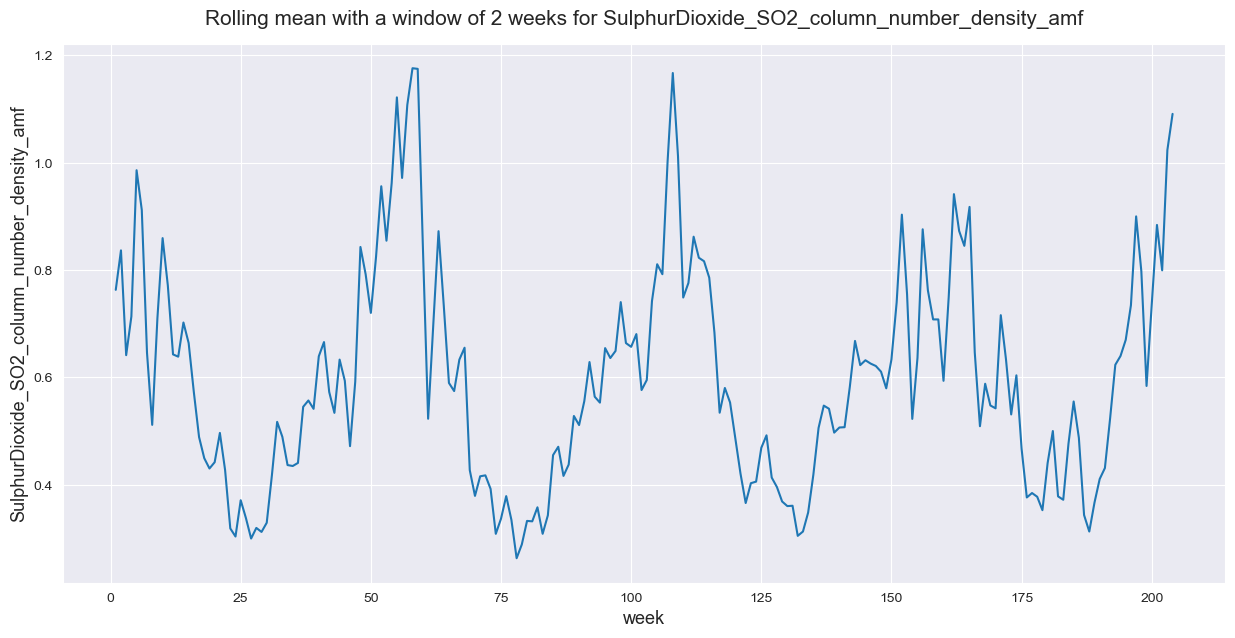

In [30]:
# Examples of feature engineering - Aggregations, cumulative differences, moving averages ...
# Lets explore the rolling mean
# First we create a unique location from lat lon
train['location'] = [str(x) + '_' + str(y) for x, y in zip(train.latitude, train.longitude)]

# Filter based on one location
example_loc = train[train.location == '-23.73_28.77']

# Calculate rolling mean for SulphurDioxide_SO2_column_number_density_amf with a window of 2 weeks
rolling_mean = example_loc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window = 2).mean()

# Visualise rolling mean
plt.figure(figsize = (15, 7))
rolling_mean.plot()
plt.title('Rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf', y = 1.02, fontsize = 15)
plt.xlabel('week', y = 1.05, fontsize = 13)
plt.ylabel('SulphurDioxide_SO2_column_number_density_amf', x = 1.05, fontsize = 13)
plt.show()

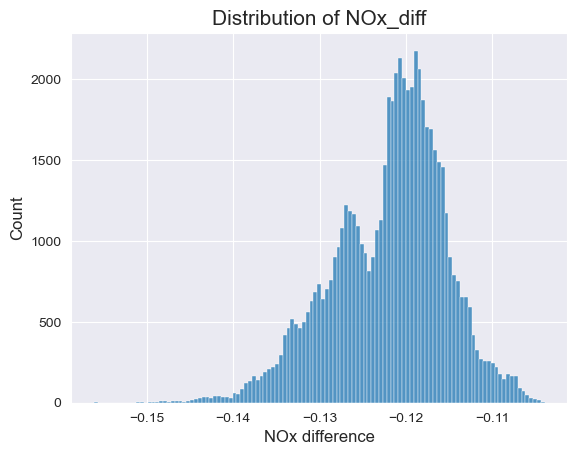

In [31]:
# Creating a new feature by taking the difference between two columns
train['NOx_diff'] = train['NitrogenDioxide_NO2_column_number_density'] - train['Ozone_O3_column_number_density']

# Visualize the distribution of the new feature
sns.histplot(train['NOx_diff'])
plt.title('Distribution of NOx_diff', fontsize = 15)
plt.xlabel('NOx difference', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()


I have created a new feature called NOx_diff by taking the difference between the NitrogenDioxide_NO2_column_number_density column and the Ozone_O3_column_number_density column in the train dataset. It then visualizes the distribution of this new feature using a histogram plot.

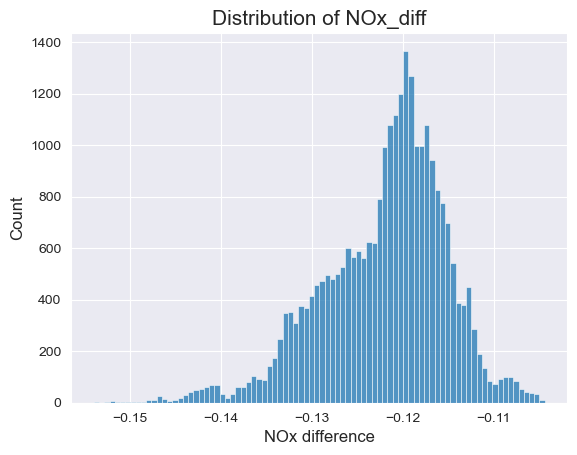

In [32]:
# we do the same for the test data 
# Creating a new feature by taking the difference between two columns
test['NOx_diff'] = test['NitrogenDioxide_NO2_column_number_density'] - test['Ozone_O3_column_number_density']

# Visualize the distribution of the new feature
sns.histplot(test['NOx_diff'])
plt.title('Distribution of NOx_diff', fontsize = 15)
plt.xlabel('NOx difference', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

In [33]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location,NOx_diff
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.939440,...,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.051700,-23.73_28.77,-0.121322
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,16.624162,...,3034.461661,12.218664,0.244987,4.708856,42.586683,-89.904314,22.773246,88.875670,-23.73_28.77,-0.118522
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019,3,-0.000065,0.860306,-0.000062,0.161050,-13.237244,...,1433.482587,6.062737,0.245102,76.060628,34.737544,-83.595254,17.437300,91.723114,-23.73_28.77,-0.118790
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019,4,0.000152,0.422284,0.000087,0.046504,-13.534653,...,2878.512917,6.388233,0.210904,75.912368,60.294490,-71.896728,11.977818,92.883870,-23.73_28.77,-0.116124
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019,5,0.000024,1.004578,0.000028,0.214246,-13.475718,...,1094.665344,9.206252,0.261103,-13.346079,50.194493,-77.462082,24.374270,94.878330,-23.73_28.77,-0.121500


In [34]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,NOx_diff
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,0.000077,0.454468,0.000034,0.114291,-80.286309,...,2180.266538,81287.074479,1562.031017,10.734123,0.280660,-31.230174,33.337966,-93.217261,23.358251,-0.121445
1,ID_-23.53_27.47_2019_2,-23.53,27.47,2019,2,0.000181,0.423171,0.000062,0.075100,-17.765690,...,982.619057,90307.650011,927.111222,5.250020,0.238933,66.490898,58.137794,-85.001467,13.416481,-0.118774
2,ID_-23.53_27.47_2019_3,-23.53,27.47,2019,3,0.000059,0.713085,0.000043,0.114210,16.725653,...,1582.964934,85383.151853,1006.778109,6.819371,0.258681,75.923186,41.336951,-83.267543,16.273000,-0.118410
3,ID_-23.53_27.47_2019_4,-23.53,27.47,2019,4,0.000483,0.434454,0.000171,0.131394,-22.475340,...,3935.419981,67490.031362,3428.423528,6.233628,0.281542,-11.023230,60.689869,-77.763718,22.793961,-0.118730
4,ID_-23.53_27.47_2019_5,-23.53,27.47,2019,5,0.000193,0.783044,0.000141,0.161142,4.750356,...,1647.538526,84478.743043,1122.534093,11.810251,0.281564,-13.294513,51.007132,-76.620646,23.198242,-0.120666


# 10. Modelling

In [ ]:
# Selecting the independent variables and the target variable
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis = 1).fillna(0)
y = train.emission

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Instantiating the model
clf = RandomForestRegressor(random_state = SEED, n_jobs=-1)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') 

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Instantiating the model
xgb = XGBRegressor(random_state = SEED, n_jobs=-1)
xgb.fit(X_train, y_train)

# Making predictions
y_pred = xgb.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Instantiating the model
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

# Making predictions
y_pred = lr.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') 

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# Instantiating the model
lg = LGBMRegressor(random_state = SEED, n_jobs=-1)
lg.fit(X_train, y_train)

# Making predictions
y_pred = lg.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') 

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
# Instantiating the model
cat = CatBoostRegressor(random_state = SEED)
cat.fit(X_train, y_train)

# Making predictions
y_pred = cat.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}')

# random forest is the best option 

<a name="Predictions"></a>
## 12. Making predictions of the test set and creating a submission file

In [ ]:
# Make prediction on the test set
test_df = test.drop(['ID_LAT_LON_YEAR_WEEK'], axis = 1).fillna(0)
predictions = clf.predict(test_df)

In [ ]:
# # Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
sub_file.head()

In [ ]:
# Create file
sub_file.to_csv('PriorSubmission.csv', index = False) # Download subfile 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Set seed for reproducability
import random
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

# Load the dataset
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

# Perform feature engineering
# ...

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = train.drop('emission', axis=1)
y = train['emission']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Use a diverse set of models and ensemble techniques
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {'Decision Tree': DecisionTreeRegressor(random_state=SEED),
          'Random Forest': RandomForestRegressor(random_state=SEED),
          'Gradient Boosting': GradientBoostingRegressor(random_state=SEED),
          'SVM': SVR(),
          'XGBoost': XGBRegressor(random_state=SEED)}

# Train and evaluate the models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

results = {}

for name, model in models.items():
    model_results = []
    for train_index, val_index in cv.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_val_cv)
        
        mae_cv = mean_absolute_error(y_val_cv, y_pred_cv)
        mse_cv = mean_squared_error(y_val_cv, y_pred_cv)
        r2_cv = r2_score(y_val_cv, y_pred_cv)
        
        model_results.append([mae_cv, mse_cv, r2_cv])
        
    model_results = np.mean(model_results, axis=0)
    results[name] = model_results

    
    
    
The code given is a good starting point for the Ernst & Young Carbon Prediction Hackathon. Here are some changes that can be made to improve the performance of the model:

Feature engineering:

Explore the relationship between features and the target variable to identify possible new features.
Perform advanced feature engineering techniques such as dimensionality reduction, feature scaling, feature selection, and domain knowledge-based feature engineering.
Model selection:

Use a diverse set of models and ensemble techniques such as decision trees, random forests, SVMs, boosting, bagging, and deep learning models.
Experiment with different hyperparameters to optimize the performance of each model.
Evaluation:

Use a more robust evaluation metric such as mean absolute error, mean squared error, or R-squared.
Use cross-validation techniques such as k-fold cross-validation or leave-one-out cross-validation to prevent overfitting.
Data augmentation:

Use more data to train the models, if possible. Gather additional datasets or augment the existing dataset with new data.
Deployment:

Select the best model based on the evaluation metric and deploy the model to predict carbon emissions across Africa.
